In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from statistics import mean, stdev
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_validate, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

In [56]:
dataset = pd.read_csv(f"/Users/ayhancagan/Desktop/Projects/Classification Projects/HMEQ_Classificaton/hmeq.csv",delimiter=",")
dataset.head(100) 

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,4000,74000.0,93000.0,HomeImp,ProfExe,2.6,1.0,3.0,186.633333,NaN,9.0,NaN
96,1,4000,55000.0,59000.0,DebtCon,Other,12.0,2.0,0.0,146.100000,0.0,22.0,NaN
97,0,4000,67625.0,80698.0,HomeImp,Mgr,11.0,NaN,1.0,212.349304,0.0,25.0,39.128718
98,0,4000,67533.0,71865.0,HomeImp,Mgr,10.0,NaN,2.0,227.792988,0.0,25.0,39.166329


In [57]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [58]:
dataset.describe() 

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [59]:
MissingData=dataset.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') 
MissingData

,Variables,Missing Values
0,BAD,0
1,LOAN,0
2,MORTDUE,518
3,VALUE,112
4,REASON,252
5,JOB,279
6,YOJ,515
7,DEROG,708
8,DELINQ,580
9,CLAGE,308


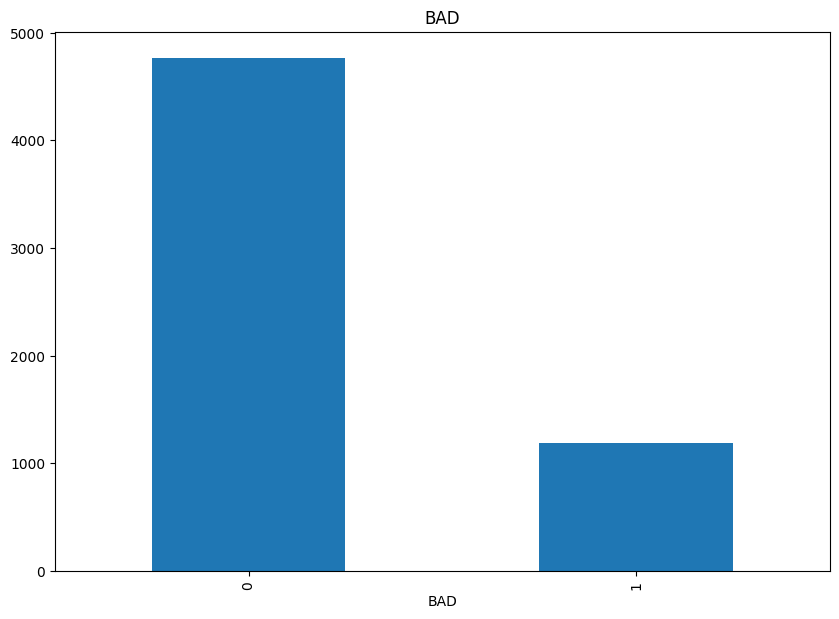

In [60]:
dataset["BAD"].value_counts().plot.bar(title='BAD') ## There is an imbalance in the distribution.
plt.show()

### pre_processing categorical features

In [61]:
dataset.head(1000)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.931156,0.0,11.0,32.327495
996,0,9400,81596.0,116738.0,HomeImp,Office,28.0,0.0,0.0,338.629035,1.0,38.0,34.169514
997,0,9400,76989.0,88788.0,HomeImp,Other,24.0,0.0,0.0,350.639006,0.0,46.0,30.061371
998,0,9400,57000.0,70000.0,DebtCon,Other,4.0,0.0,0.0,179.566667,2.0,17.0,NaN


In [62]:
dataset["REASON"] = dataset["REASON"].fillna("Other") #We are filling the null values in the dataset with "other".
print(dataset["REASON"].unique()) 

['HomeImp' 'Other' 'DebtCon']


In [63]:
dataset["JOB"] = dataset["JOB"].fillna(dataset["JOB"].mode()[0])  # We are filling the null values in the "job" column with the most frequently occurring values.
print(dataset["JOB"].unique()) 

['Other' 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']


### Pre processing of numeric features

In [64]:
dataset["DEROG"] = dataset["DEROG"].fillna(0) # Null values are being filled with 0. If the derogatory report count is null, it means there is no report, so filling it with 0 is logical.
print(dataset["DEROG"].unique())

[ 0.  3.  2.  1.  4.  5.  6.  7.  8.  9. 10.]


In [65]:
dataset["DELINQ"] = dataset["DELINQ"].fillna(0) # If the count of delayed credit limits is null, it also implies the same logic of 0.
print(dataset["DELINQ"].unique())

[ 0.  2.  1.  6. 15.  4.  3.  5.  7.  8. 10. 12. 11. 13.]


In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


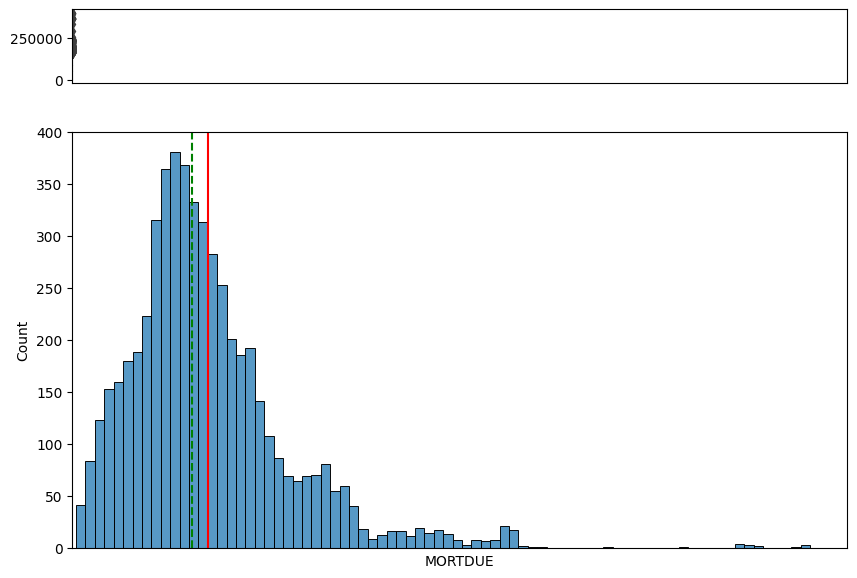

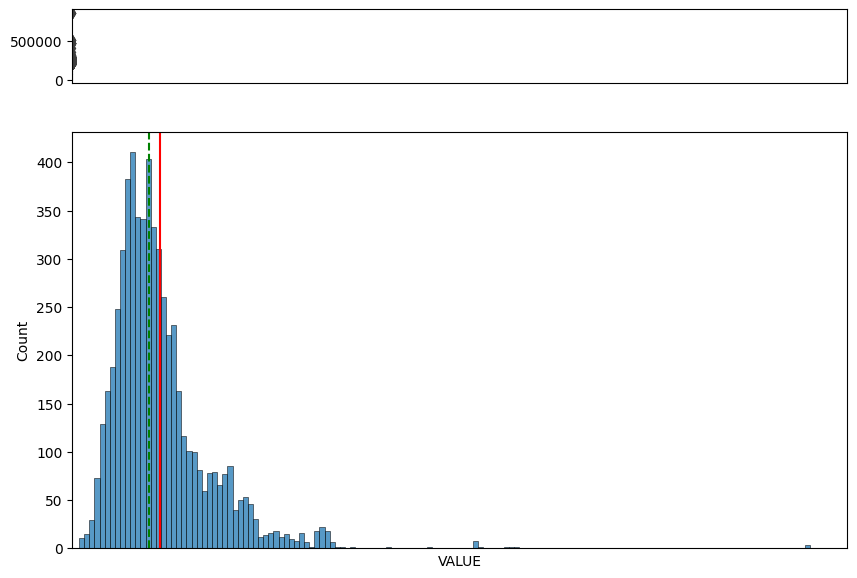

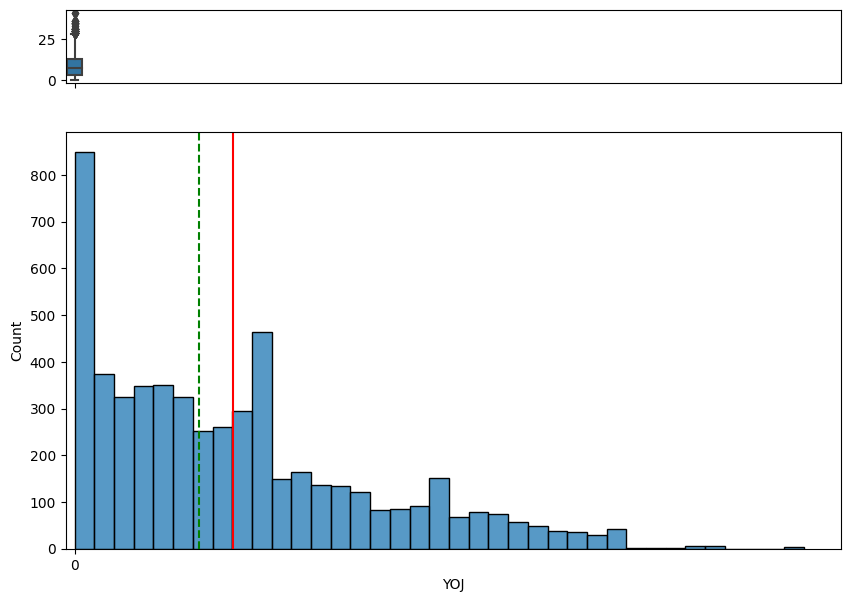

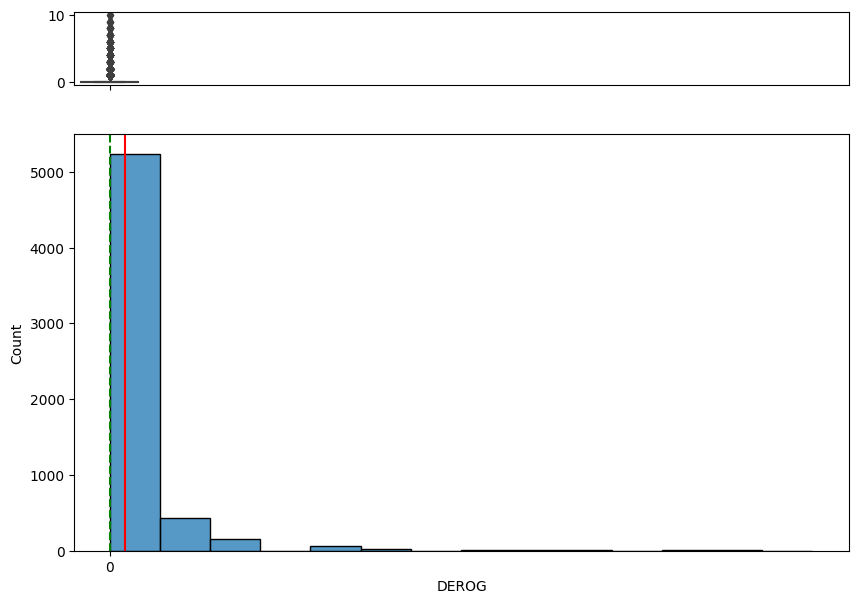

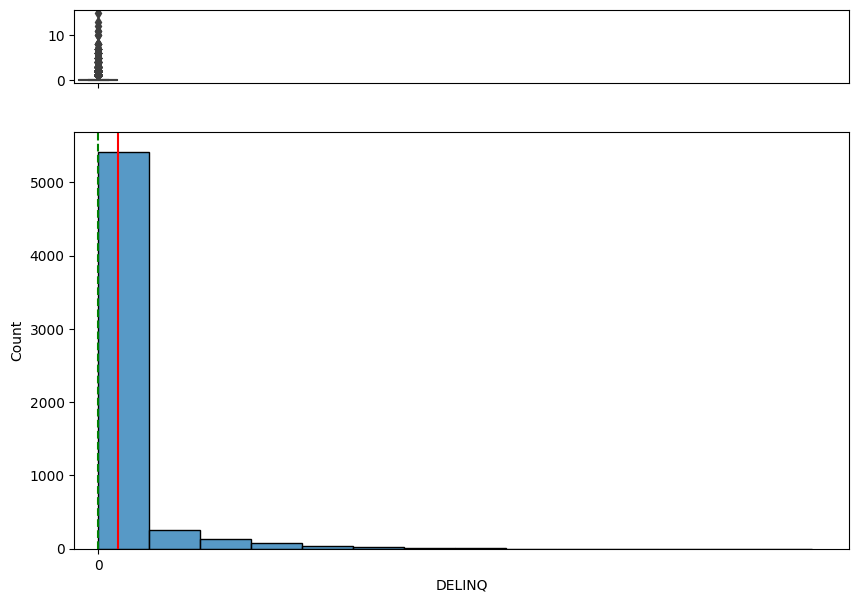

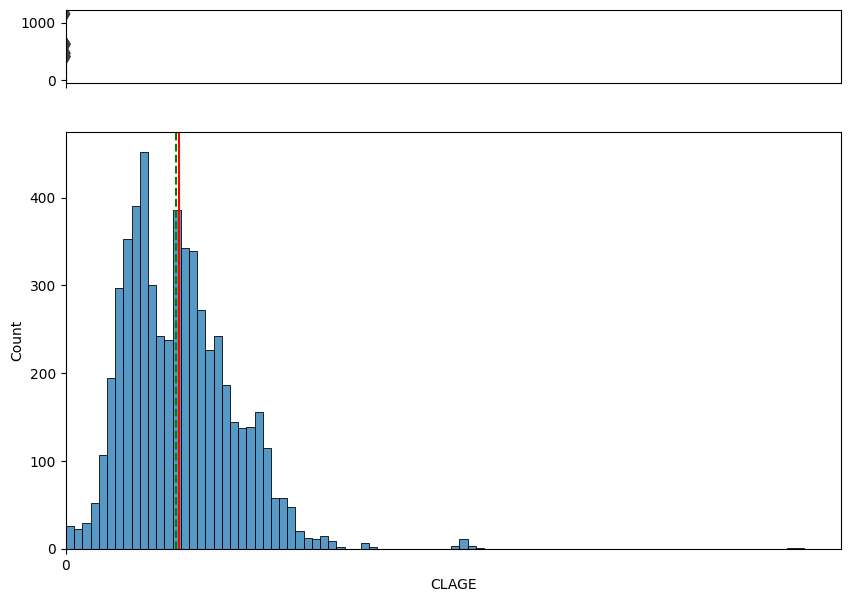

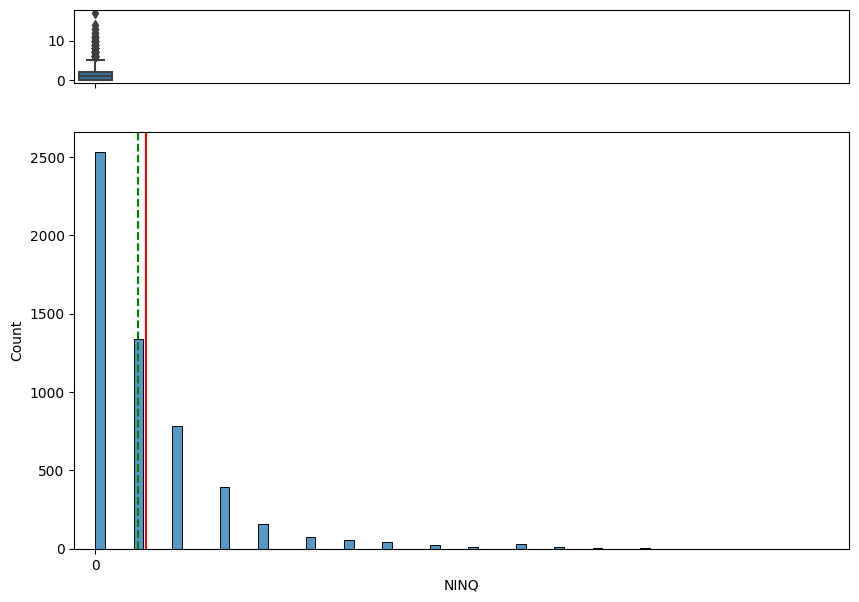

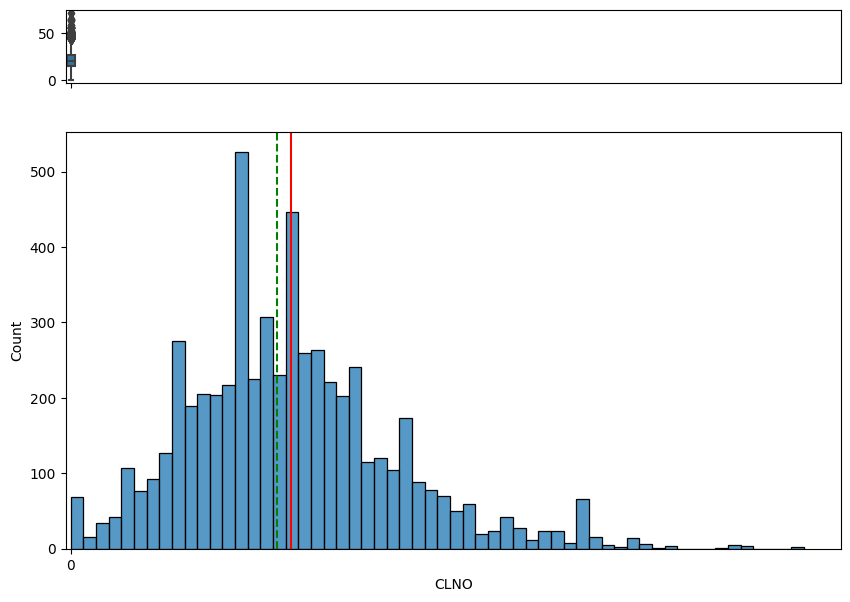

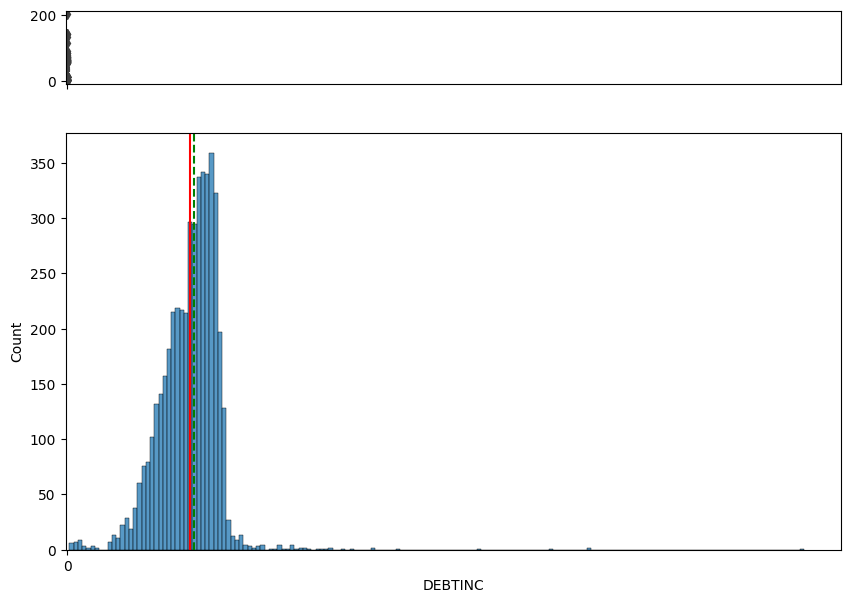

In [67]:
for TARGET in dataset.select_dtypes(include=['float64']):
    plt.rcParams["figure.figsize"] = (10,7)  
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})


    sns.boxplot(dataset[TARGET], ax=ax_box)
    sns.histplot(dataset[TARGET], ax= ax_hist)

    #draw mean and median
    plt.axvline(x=dataset[TARGET].mean(), color='red')
    plt.axvline(x=dataset[TARGET].median(), color='green', linestyle='--')

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    plt.show()

In [68]:
dataset["VALUE"] = dataset["VALUE"].fillna(dataset["VALUE"].median()) #We filled the missing values with the median due to the skewed distribution
dataset["YOJ"] = dataset["YOJ"].fillna(dataset["YOJ"].median())
dataset["CLAGE"] = dataset["CLAGE"].fillna(dataset["CLAGE"].median())
dataset["NINQ"] = dataset["NINQ"].fillna(dataset["NINQ"].median())
dataset["CLNO"] = dataset["CLNO"].fillna(dataset["CLNO"].median())
dataset["DEBTINC"] = dataset["DEBTINC"].fillna(dataset["DEBTINC"].median())

### ENCODİNG

In [69]:
dataset=pd.get_dummies(dataset, columns=['REASON','JOB'], drop_first=True) 


In [70]:
dataset.head(1000)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,REASON_Other,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,True,False,False,True,False,False,False
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,True,False,False,True,False,False,False
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,True,False,False,True,False,False,False
3,1,1500,NaN,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,False,True,False,True,False,False,False
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,9400,56508.0,78358.0,17.0,0.0,0.0,141.931156,0.0,11.0,32.327495,False,False,False,True,False,False,False
996,0,9400,81596.0,116738.0,28.0,0.0,0.0,338.629035,1.0,38.0,34.169514,True,False,True,False,False,False,False
997,0,9400,76989.0,88788.0,24.0,0.0,0.0,350.639006,0.0,46.0,30.061371,True,False,False,True,False,False,False
998,0,9400,57000.0,70000.0,4.0,0.0,0.0,179.566667,2.0,17.0,34.818262,False,False,False,True,False,False,False


In [71]:
dataset.isna().sum() # null Value Check 

BAD                 0
LOAN                0
MORTDUE           518
VALUE               0
YOJ                 0
DEROG               0
DELINQ              0
CLAGE               0
NINQ                0
CLNO                0
DEBTINC             0
REASON_HomeImp      0
REASON_Other        0
JOB_Office          0
JOB_Other           0
JOB_ProfExe         0
JOB_Sales           0
JOB_Self            0
dtype: int64

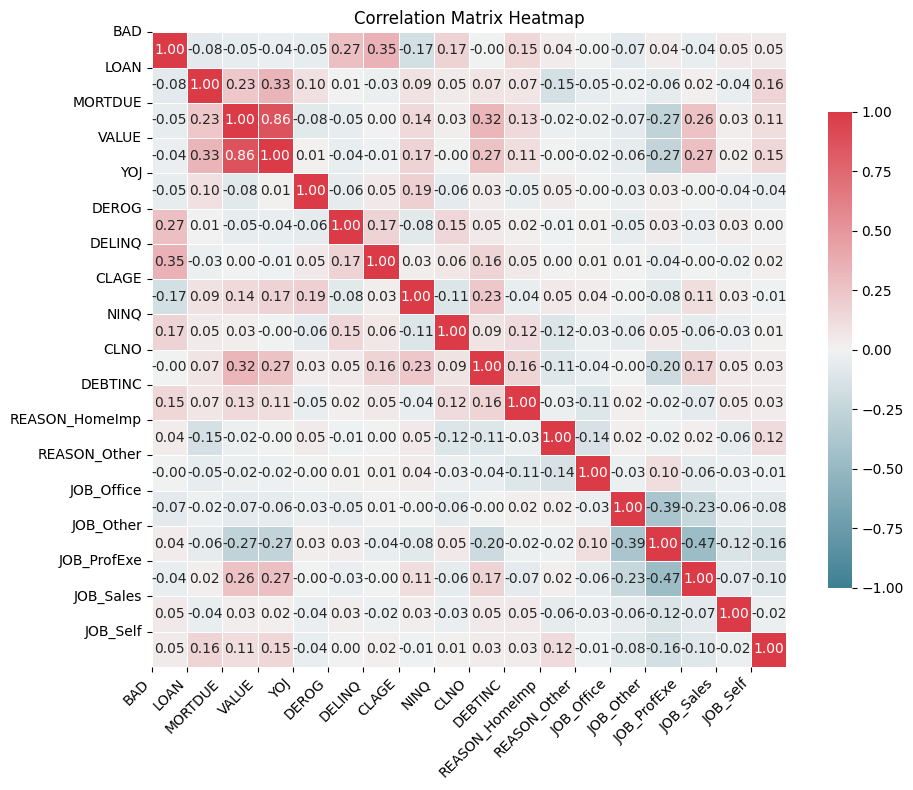

In [72]:
#Create Correlation matrix
corr = dataset.corr() 
#Plot figsize
fig, ax = plt.subplots(figsize=(10,8))  
#Generate Color Map
custom_palette = sns.color_palette("RdBu_r", n_colors=20)  # Choose a palette of your choice
colormap = sns.diverging_palette(220, 10, as_cmap=True) 
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", square=True, linewidths=.5, ax=ax, center=0,
            cbar_kws={"shrink": 0.75}, vmax=1, vmin=-1) 
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns, rotation=0)

plt.title("Correlation Matrix Heatmap")

# Show plot
plt.tight_layout()
plt.show()  

In [73]:
dataset.drop(["MORTDUE"], axis=1, inplace=True) # Correlation drop 
dataset.head() 

,BAD,LOAN,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,REASON_Other,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,True,False,False,True,False,False,False
1,1,1300,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,True,False,False,True,False,False,False
2,1,1500,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,True,False,False,True,False,False,False
3,1,1500,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,False,True,False,True,False,False,False
4,0,1700,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,True,False,True,False,False,False,False


In [74]:
X = dataset.iloc[:, 1:].values 
y = dataset.iloc[:, 0].values
print(y)

[1 1 1 ... 0 0 0]


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify=y, random_state = 0)  #stratify=y Unstable data 

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False) 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

### Training

In [77]:
classifier = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(probability=True),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
]

LogisticRegression()
	Accuracy Score: 0.8348993288590604
	Confusion Matrix: [[1154   39]
 [ 207   90]]
	F1 Score: 0.4225352112676056
	Precision: 0.6976744186046512
	Recall: 0.30303030303030304
	Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1193
           1       0.70      0.30      0.42       297

    accuracy                           0.83      1490
   macro avg       0.77      0.64      0.66      1490
weighted avg       0.82      0.83      0.81      1490



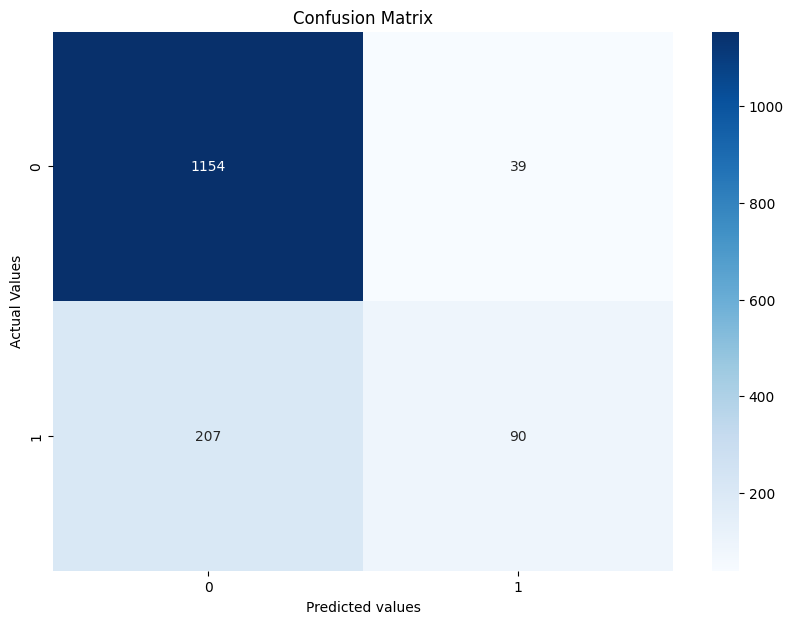

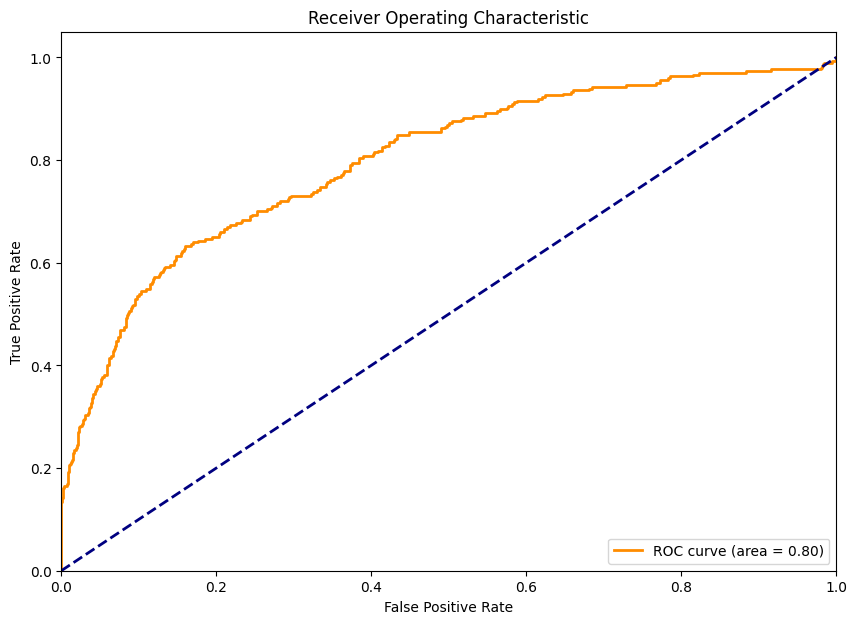

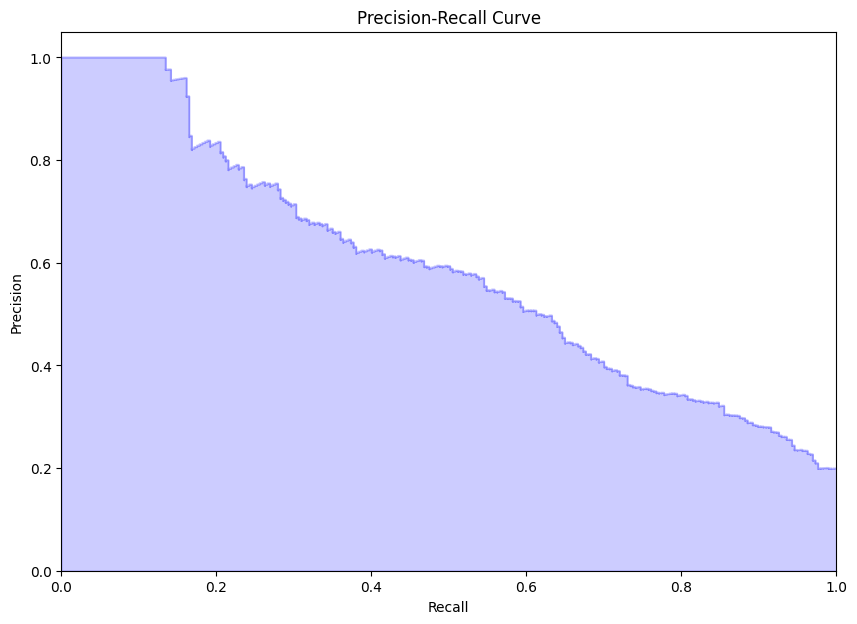


DecisionTreeClassifier()
	Accuracy Score: 0.87248322147651
	Confusion Matrix: [[1107   86]
 [ 104  193]]
	F1 Score: 0.6701388888888888
	Precision: 0.6917562724014337
	Recall: 0.6498316498316499
	Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1193
           1       0.69      0.65      0.67       297

    accuracy                           0.87      1490
   macro avg       0.80      0.79      0.80      1490
weighted avg       0.87      0.87      0.87      1490



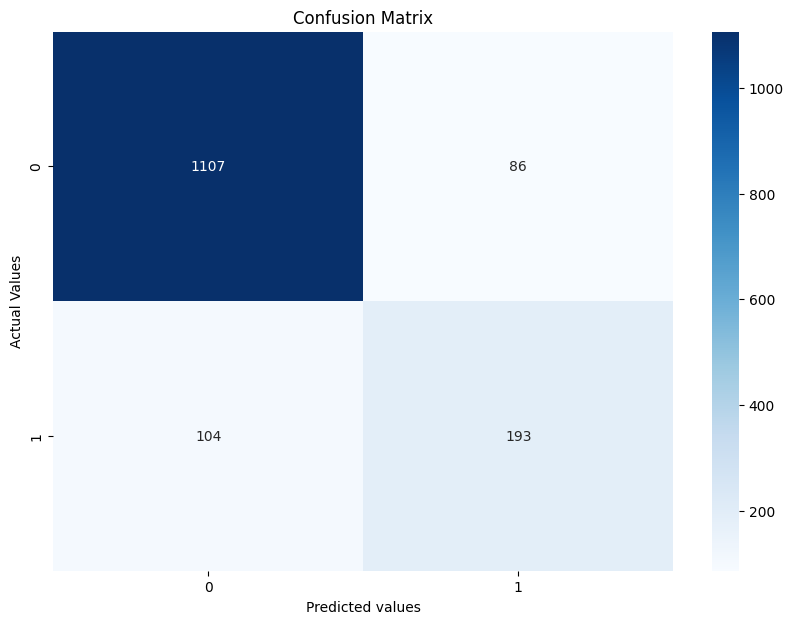

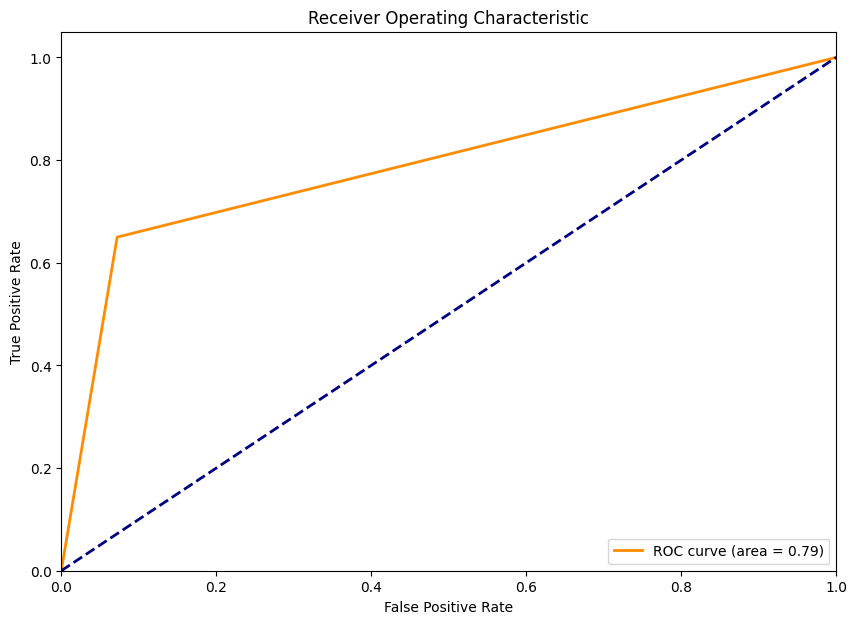

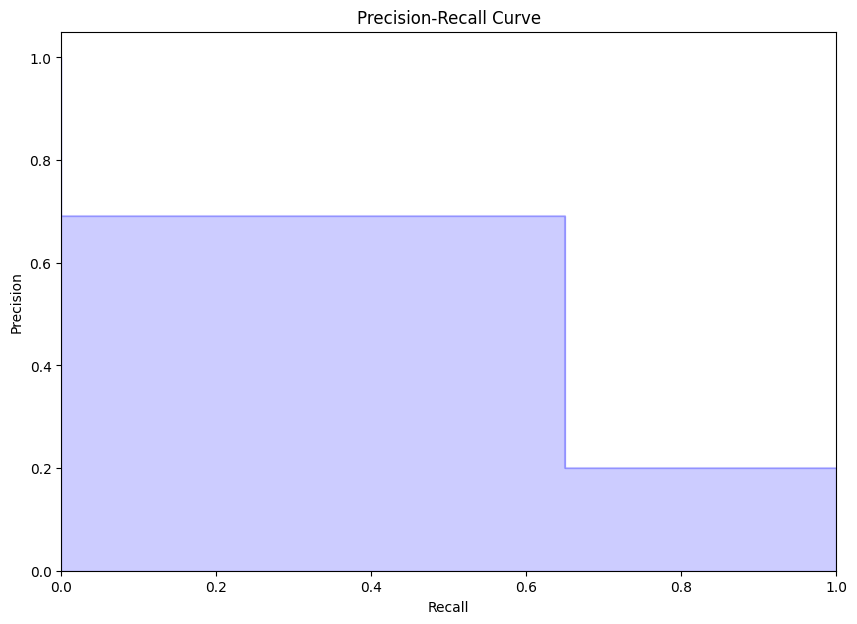


RandomForestClassifier()
	Accuracy Score: 0.9221476510067114
	Confusion Matrix: [[1167   26]
 [  90  207]]
	F1 Score: 0.781132075471698
	Precision: 0.8884120171673819
	Recall: 0.696969696969697
	Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      1193
           1       0.89      0.70      0.78       297

    accuracy                           0.92      1490
   macro avg       0.91      0.84      0.87      1490
weighted avg       0.92      0.92      0.92      1490



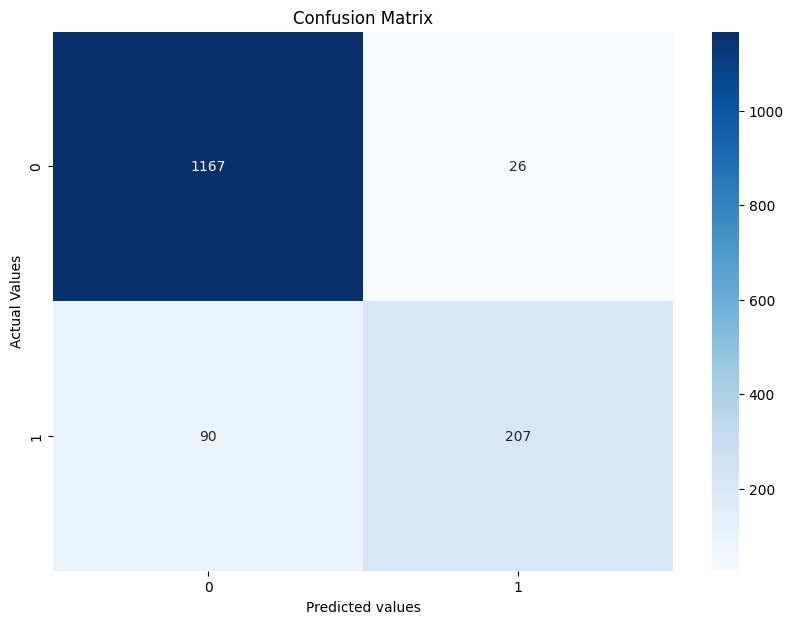

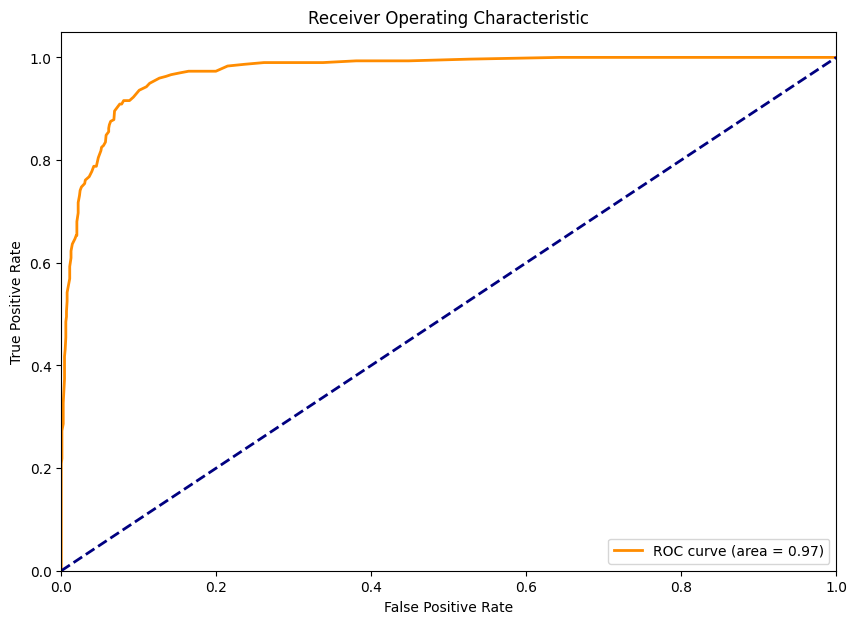

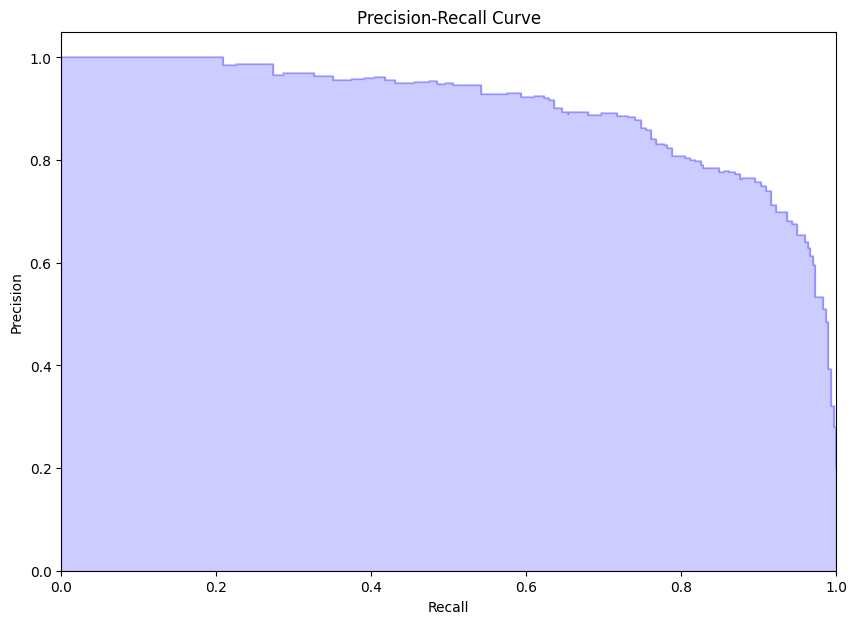


SVC(probability=True)
	Accuracy Score: 0.8516778523489933
	Confusion Matrix: [[1186    7]
 [ 214   83]]
	F1 Score: 0.4289405684754522
	Precision: 0.9222222222222223
	Recall: 0.27946127946127947
	Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91      1193
           1       0.92      0.28      0.43       297

    accuracy                           0.85      1490
   macro avg       0.88      0.64      0.67      1490
weighted avg       0.86      0.85      0.82      1490



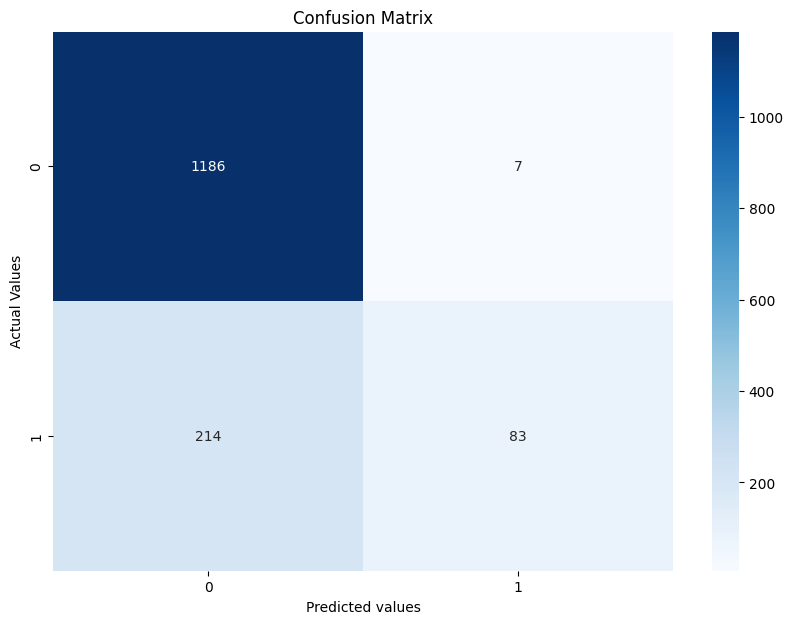

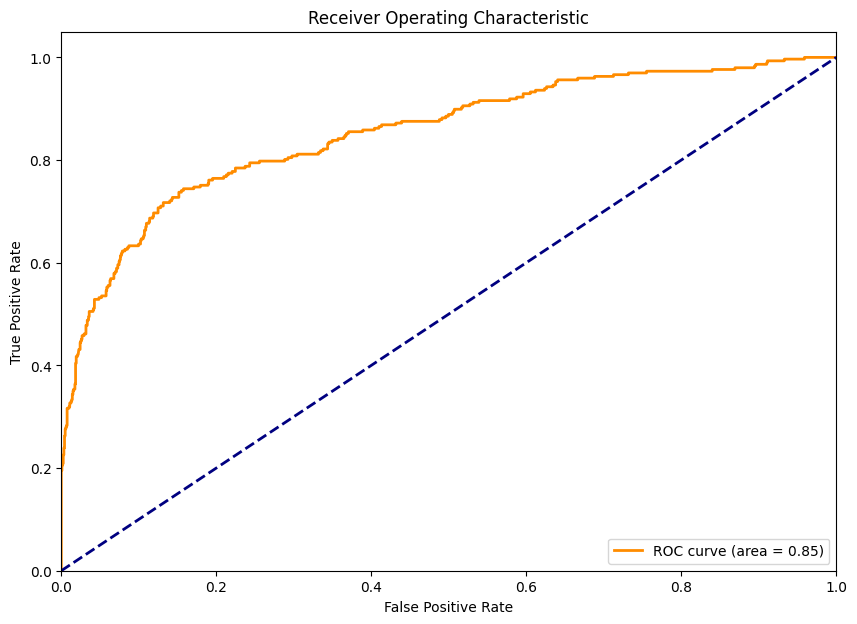

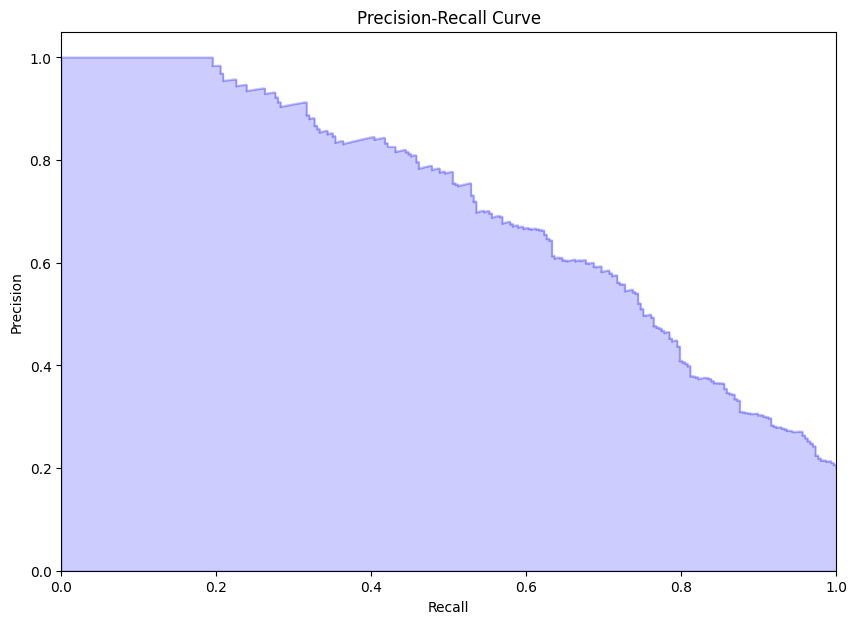


GradientBoostingClassifier()
	Accuracy Score: 0.9080536912751678
	Confusion Matrix: [[1162   31]
 [ 106  191]]
	F1 Score: 0.7360308285163776
	Precision: 0.8603603603603603
	Recall: 0.6430976430976431
	Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1193
           1       0.86      0.64      0.74       297

    accuracy                           0.91      1490
   macro avg       0.89      0.81      0.84      1490
weighted avg       0.91      0.91      0.90      1490



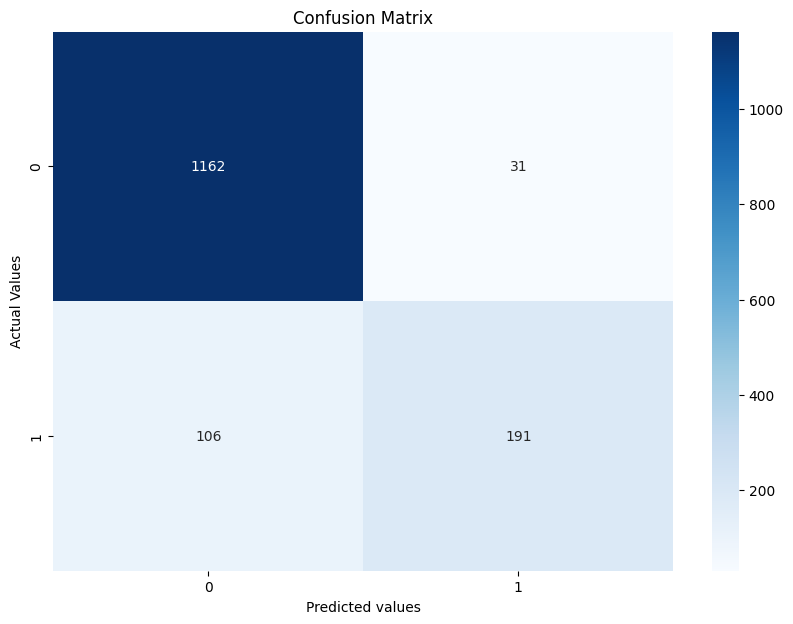

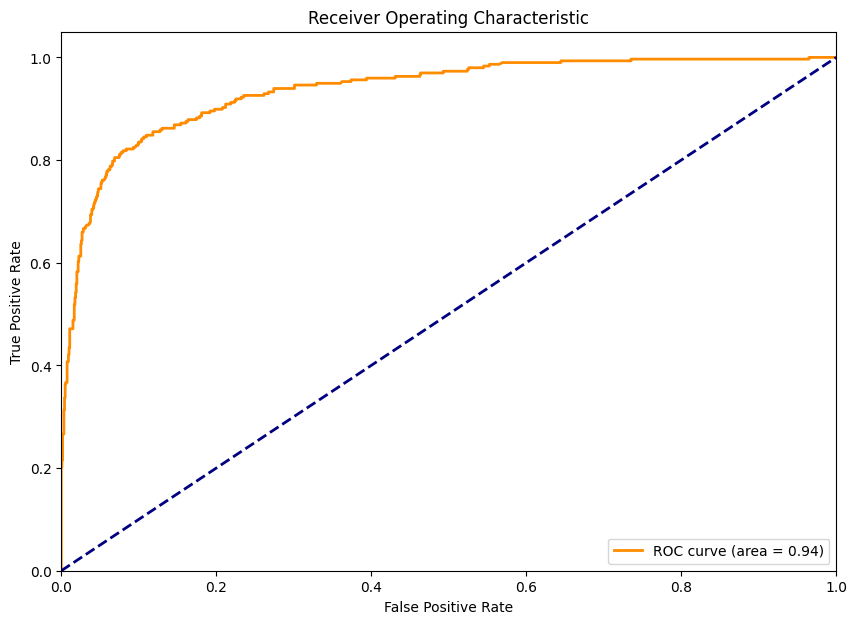

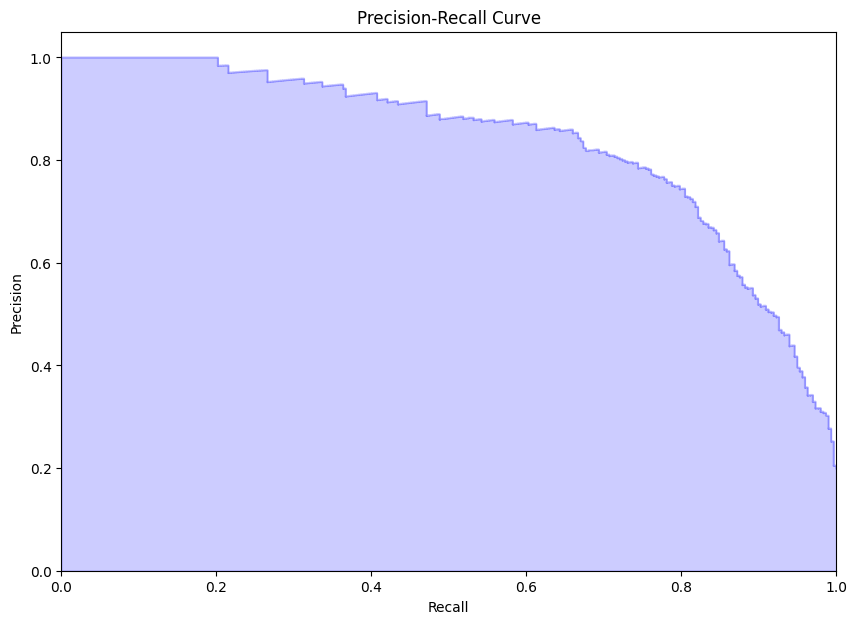


AdaBoostClassifier()
	Accuracy Score: 0.8966442953020134
	Confusion Matrix: [[1147   46]
 [ 108  189]]
	F1 Score: 0.7105263157894738
	Precision: 0.8042553191489362
	Recall: 0.6363636363636364
	Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1193
           1       0.80      0.64      0.71       297

    accuracy                           0.90      1490
   macro avg       0.86      0.80      0.82      1490
weighted avg       0.89      0.90      0.89      1490



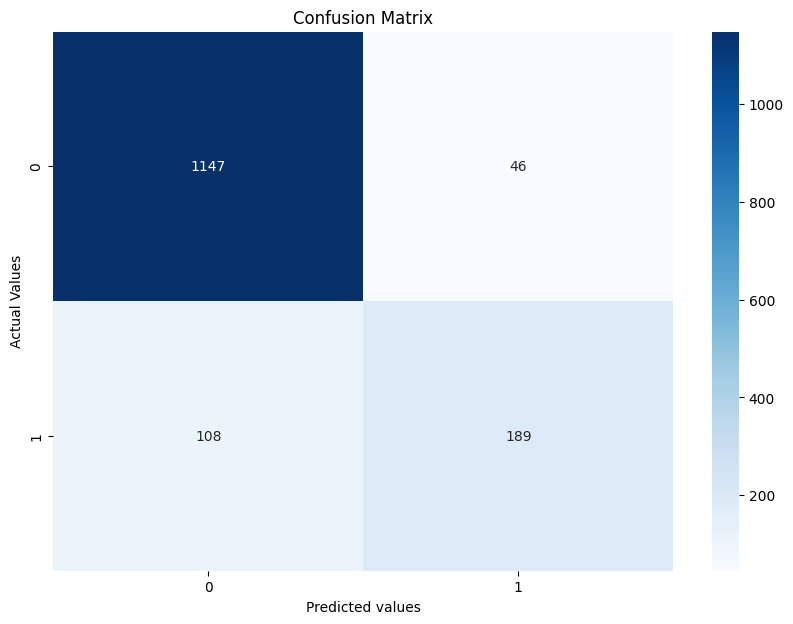

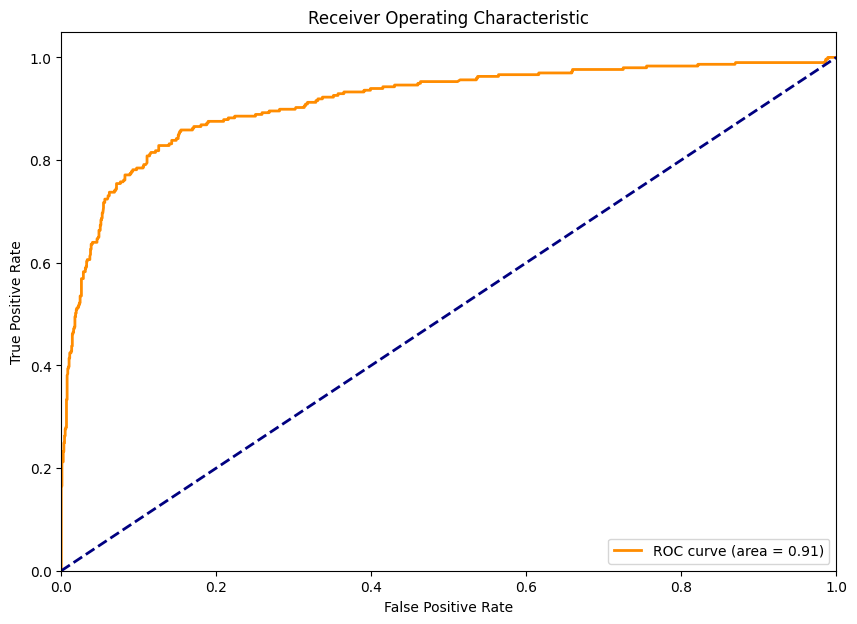

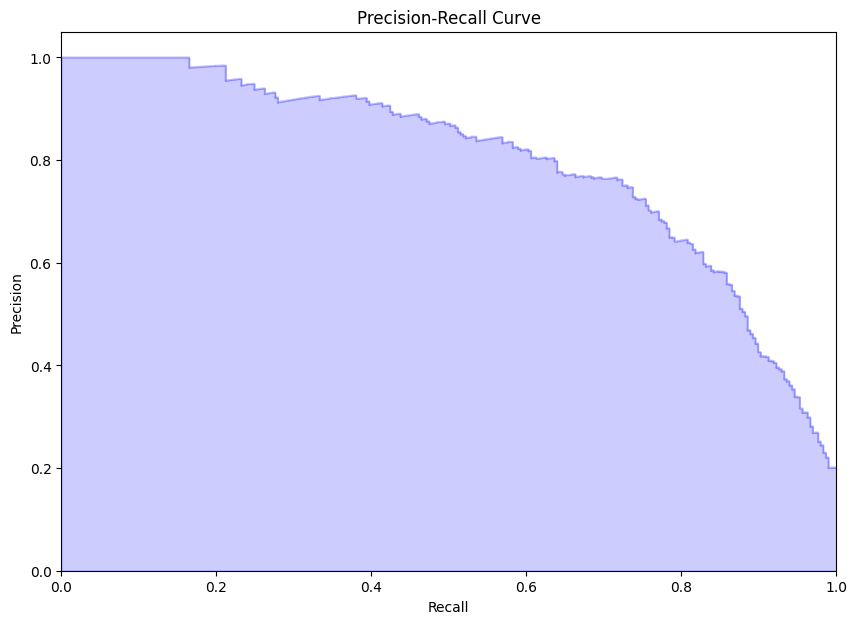


KNeighborsClassifier()
	Accuracy Score: 0.8899328859060402
	Confusion Matrix: [[1190    3]
 [ 161  136]]
	F1 Score: 0.6238532110091743
	Precision: 0.9784172661870504
	Recall: 0.45791245791245794
	Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      1193
           1       0.98      0.46      0.62       297

    accuracy                           0.89      1490
   macro avg       0.93      0.73      0.78      1490
weighted avg       0.90      0.89      0.87      1490



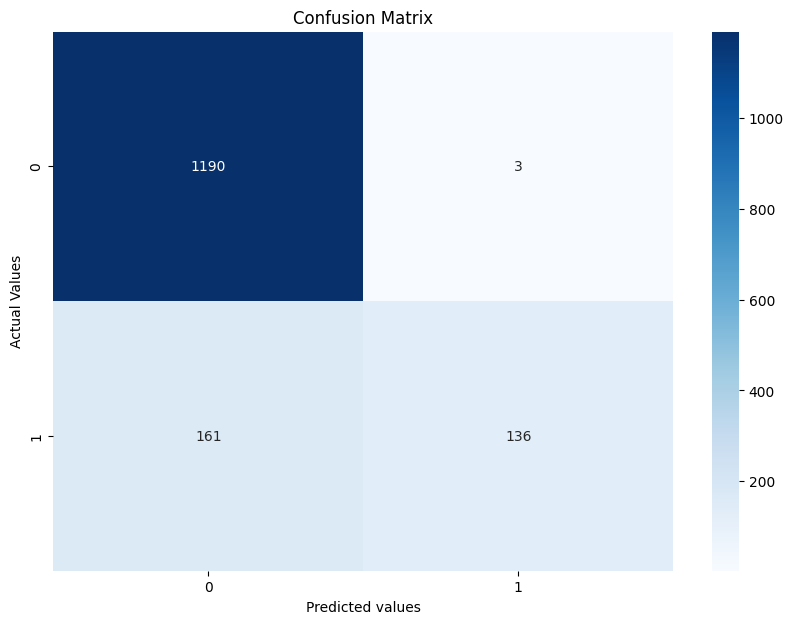

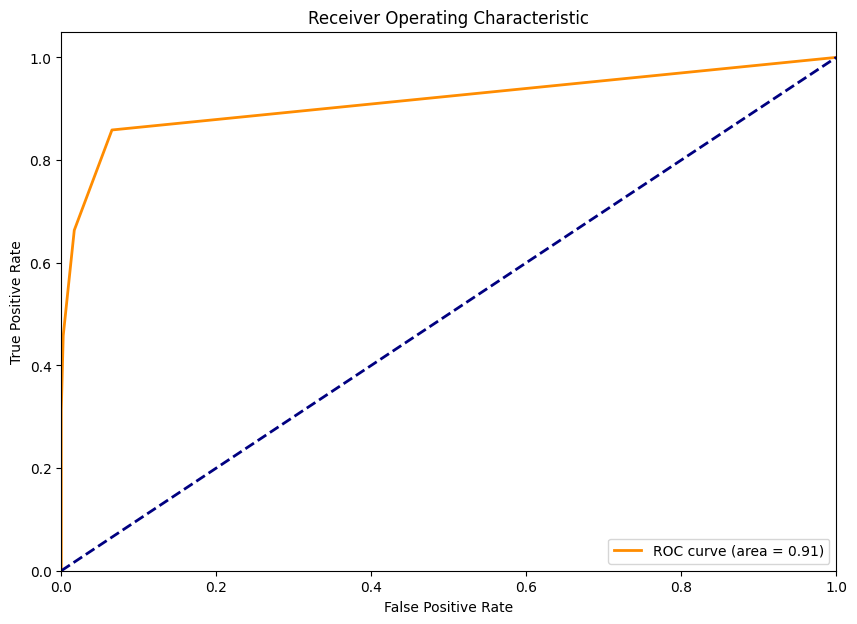

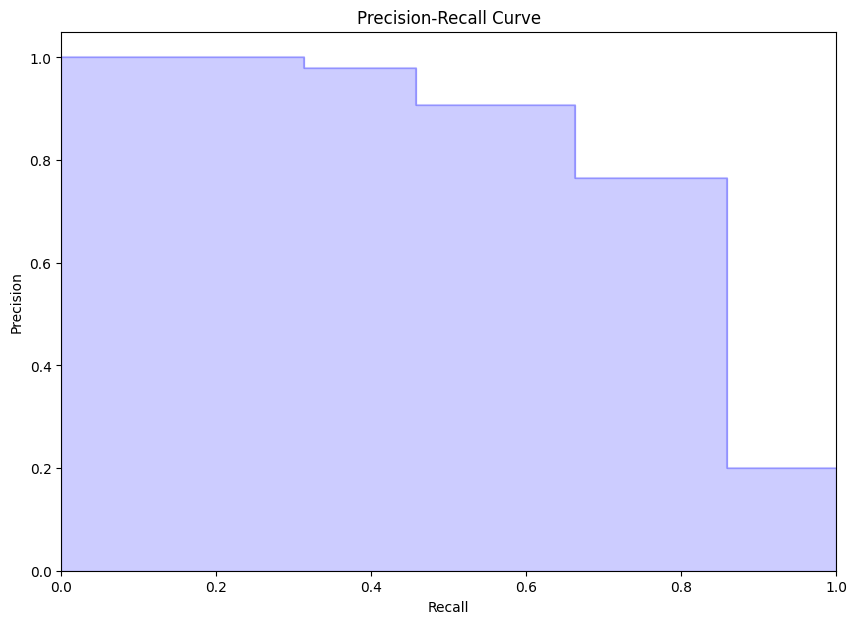

In [78]:
from time import time
head = 7
for model in classifier[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    print(model)
    #print("\tTraining time: %0.3fs" % train_time)
    #print("\tPrediction time: %0.3fs" % predict_time)
    print("\tAccuracy Score:", accuracy_score(y_test, y_pred))
    print("\tConfusion Matrix:",confusion_matrix(y_test, y_pred))

    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)


    print("\tF1 Score:", f1)
    print("\tPrecision:", precision)
    print("\tRecall:", recall)
    print("\tClassification Report:\n", report)

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")

    # Eksen etiketlerini ayarlama
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted values")
    plt.ylabel("Actual Values")

    # Grafiği gösterme
    plt.show()
    print()

     # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.show()

    print()

### BEST MODEL _ RANDOM FOREST 

In [79]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()

classifier_rf.fit(X_train, y_train)

RandomForestClassifier()

In [80]:
y_pred = classifier_rf.predict(X_test)

In [81]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Kesinlik:", precision)
print("Hassasiyet:", recall)

Kesinlik: 0.8760330578512396
Hassasiyet: 0.7138047138047138


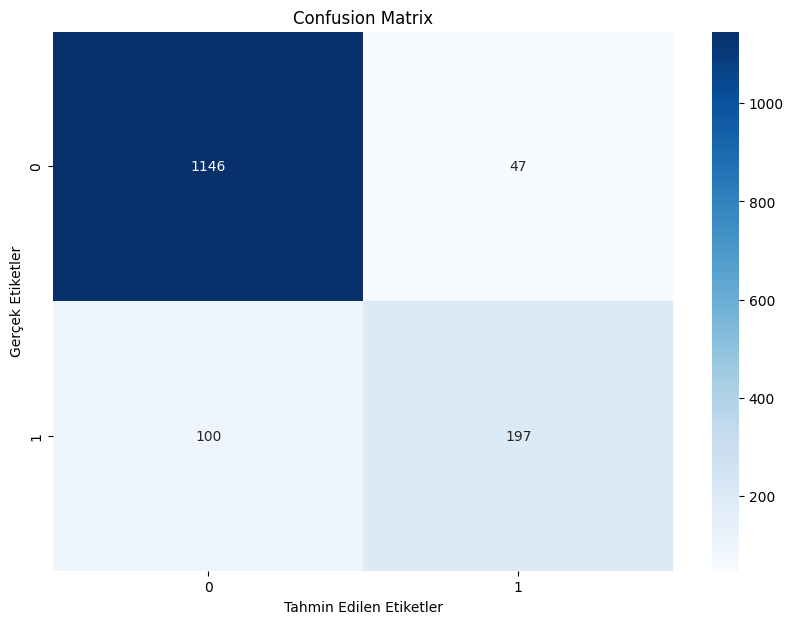

In [82]:
import matplotlib.pyplot as plt #
import seaborn as sns

# Heatmap'i çizme
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Eksen etiketlerini ayarlama
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")

# Grafiği gösterme
plt.show()

### Cross validation

In [83]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score 


Skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Testing model performance with StratifiedKFold Cross-Validation 
accuracies = cross_val_score(estimator = classifier_rf, X = X_train, y = y_train, scoring='accuracy', cv = Skfold) # weigthed accuracy 
#accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)

In [84]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))  

Accuracy: 91.23 %
Standard Deviation: 1.21 %


### Grid search_RandomFOREST

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold 

Skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

classifier_rf = RandomForestClassifier()

# Grid Search parametreleri ve değerleri belirleniyor
param_grid = {
     'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'] 
    
}


grid_search_model= GridSearchCV(estimator=classifier_rf, param_grid=param_grid, cv=Skfold, scoring='accuracy')


grid_search_model.fit(X_train, y_train) 

# En iyi parametreleri ve sonuçları görüntüleme
print("En iyi parametreler:", grid_search_model.best_params_)
print("En iyi sonuç (accuracy):", grid_search_model.best_score_)


En iyi parametreler: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
En iyi sonuç (accuracy): 0.9145413870246084


In [86]:
from sklearn.metrics import recall_score

# En iyi parametreleri içeren modeli al
best_model = grid_search_model.best_estimator_


y_pred = best_model.predict(X_test)


recall = recall_score(y_test, y_pred)

print("Recall değeri:", recall) #71 üstüne çıkmıyor


Recall değeri: 0.7171717171717171


### Xg_boosting with GridSearch

In [87]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, recall_score

classifier = XGBClassifier()


stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

recall_scorer = make_scorer(recall_score)


scores = cross_val_score(classifier, X_train, y_train, cv=stratified_kfold, scoring=recall_scorer) # cross_val_score ile StratifiedKFold çapraz doğrulama yapıyoruz.


print("Çapraz Doğrulama Sonuçları (Recall):", scores)

mean_recall = scores.mean()

print("Ortalama Recall:", mean_recall) # StratifiedKFold's recall score without grid Search 0.70







Çapraz Doğrulama Sonuçları (Recall): [0.68539326 0.70224719 0.65168539 0.76536313 0.70391061]
Ortalama Recall: 0.7017199171426779


In [89]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


classifier = XGBClassifier()

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5]
}


grid_search = GridSearchCV(classifier, param_grid, cv=stratified_kfold, scoring='recall')


grid_search.fit(X_train, y_train)


print("En İyi Parametre Kombinasyonu:", grid_search.best_params_)


print("En İyi Skor (Recall):", grid_search.best_score_)


En İyi Parametre Kombinasyonu: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300}
En İyi Skor (Recall): 0.6960956625447241


In [90]:
from sklearn.metrics import recall_score

# En iyi parametreleri içeren modeli al
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)


recall = recall_score(y_test, y_pred)

print("Recall değeri:", recall) #0.73 xgbosst score with grid search 

Recall değeri: 0.7373737373737373


In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1166   27]
 [  78  219]]


In [92]:
from sklearn.metrics import classification_report

# Evaluating the Model with Predictions
y_pred = best_model.predict(X_test)

# Calculate and display performance metrics using classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1193
           1       0.89      0.74      0.81       297

    accuracy                           0.93      1490
   macro avg       0.91      0.86      0.88      1490
weighted avg       0.93      0.93      0.93      1490



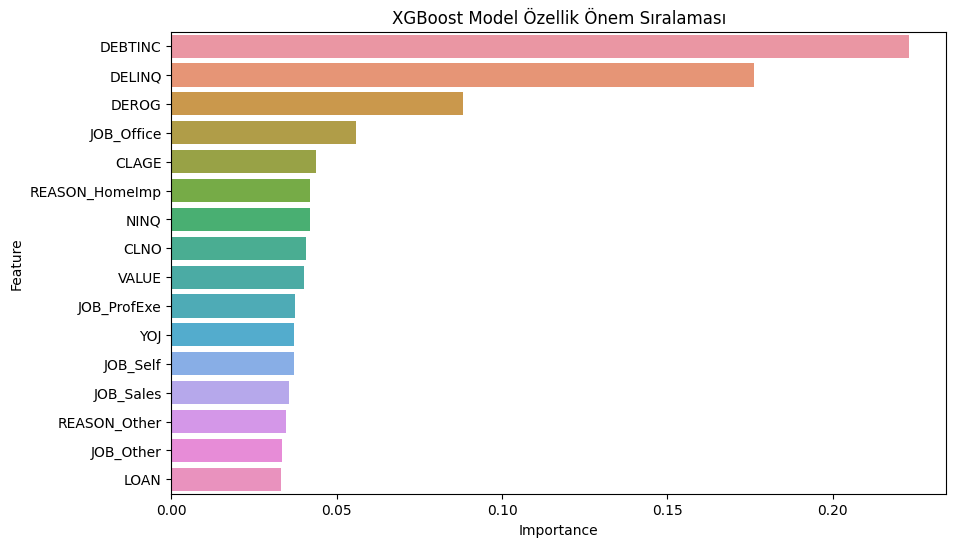

In [97]:
feature_importances = best_model.feature_importances_ 


importances_df = pd.DataFrame({'Feature': dataset.iloc[:, 1:].columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('XGBoost Model Özellik Önem Sıralaması')
plt.show()  



### Model Saving 

In [98]:
Xg_boost_model = best_model.fit(X,y) # Training all data 

In [99]:
import joblib # model kaydetme  

joblib.dump(Xg_boost_model, 'trained_Xg_boost_model_.pkl')


['trained_Xg_boost_model_.pkl']

### Real World Prediction

In [100]:
model = joblib.load('trained_Xg_boost_model_.pkl')

In [103]:
a = X[365]
a

array([6300, 57779.0, 7.0, 0.0, 0.0, 63.626413251, 1.0, 16.0,
       33.111829109, False, False, False, True, False, False, False],
      dtype=object)

In [102]:
a = [7000, 57779.0, 7.0, 0.0, 0.0, 63.626413251, 1.0, 16.0,
       33.111829109, False, False, False, True, False, False, False]

In [104]:
a = a.reshape(1,16) 

In [105]:
a.shape

(1, 16)

In [106]:
a = np.array(a)

In [107]:
y[365] # real data 

0

In [108]:
model.predict(a) # prediction data is correct 

array([0])